In [16]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [17]:
data=pd.read_csv(r'C:\braindedmemory\CP\INPYTH\minst nn\minst\train.csv')

In [18]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
data=np.array(data)
m,n=data.shape
np.random.shuffle(data)
#seprating the data into dev and train
data_dev=data[0:1000].T
Y_dev = data_dev[0]
X_dev=data_dev[1:n]
X_dev = X_dev / 255

data_train=data[1000:m].T
Y_train = data_train[0]
X_train=data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape
m,n



(42000, 785)

In [20]:
def init_params():
    W1=np.random.rand(10,784)-0.5
    b1=np.random.rand(10,1)-0.5
    W2=np.random.rand(10,10)-0.5
    b2=np.random.rand(10,1)-0.5
    return W1,b1,W2,b2

def ReLU(Z):
    return np.maximum(Z,0)

def softmax(Z):
    A=np.exp(Z)/sum(np.exp(Z))
    return A


def forward_prod(W1,b1,W2,b2,X):
    Z1=W1.dot(X)+b1
    A1=ReLU(Z1)
    Z2=W2.dot(A1)+b2
    A2=softmax(Z2)
    return Z1,A1,Z2,A2

def deriv_ReLU(Z):
    return Z>0
    
def one_hot(Y):
    one_hot_Y=np.zeros((Y.size,Y.max()+1))
    one_hot_Y[np.arange(Y.size),Y]=1
    one_hot_Y= one_hot_Y.T
    return one_hot_Y



def back_prop(Z1,A1,Z2,A2,W2,X,Y):
    one_hot_Y=one_hot(Y)
    A2
    dZ2=A2-one_hot_Y
    dW2=1/m * dZ2.dot(A1.T)
    db2=1/m * np.sum(dZ2)
    dZ1=W2.T.dot(dZ2)*deriv_ReLU(Z1)
    dW1=1/m * dZ1.dot(X.T)
    db1=1/m * np.sum(dZ1)
    return dW1,db1,dW2,db2

def update_params(W1,b1,W2,b2,dW1,db1,dW2,db2,alpha):
    W1=W1-alpha*dW1
    b1=b1-alpha*db1
    W2=W2-alpha*dW2
    b2=b2-alpha*db2
    return W1,b1,W2,b2


In [21]:
def get_pred(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size


def gradient_descent(X,Y,iter,alpha):
    W1,b1,W2,b2=init_params()
    for i in range(iter):
        Z1,A1,Z2,A2=forward_prod(W1,b1,W2,b2,X)
        dW1,db1,dW2,db2=back_prop(Z1,A1,Z2,A2,W2,X,Y)
        W1,b1,W2,b2=update_params(W1,b1,W2,b2,dW1,db1,dW2,db2,alpha)
        if i%50==0:
            print("Iteration: ",i)
            print("Accuracy: ",get_accuracy(get_pred(A2),Y))
    return W1,b1,W2,b2

In [22]:
W1,b1,W2,b2=gradient_descent(X_train,Y_train,1000,0.1)

Iteration:  0
[3 9 7 ... 7 3 9] [6 1 6 ... 0 8 3]
Accuracy:  0.08092682926829269
Iteration:  50
[6 8 0 ... 0 6 8] [6 1 6 ... 0 8 3]
Accuracy:  0.3058780487804878
Iteration:  100
[6 1 6 ... 0 6 8] [6 1 6 ... 0 8 3]
Accuracy:  0.5653170731707317
Iteration:  150
[6 1 6 ... 0 8 3] [6 1 6 ... 0 8 3]
Accuracy:  0.6787073170731708
Iteration:  200
[6 1 6 ... 0 8 3] [6 1 6 ... 0 8 3]
Accuracy:  0.7281219512195122
Iteration:  250
[6 1 6 ... 0 8 3] [6 1 6 ... 0 8 3]
Accuracy:  0.7613170731707317
Iteration:  300
[6 1 6 ... 0 8 3] [6 1 6 ... 0 8 3]
Accuracy:  0.7872682926829269
Iteration:  350
[6 1 6 ... 0 8 3] [6 1 6 ... 0 8 3]
Accuracy:  0.8054878048780488
Iteration:  400
[6 1 6 ... 0 8 3] [6 1 6 ... 0 8 3]
Accuracy:  0.8215121951219512
Iteration:  450
[6 1 6 ... 0 8 3] [6 1 6 ... 0 8 3]
Accuracy:  0.8336829268292683
Iteration:  500
[6 1 6 ... 0 8 3] [6 1 6 ... 0 8 3]
Accuracy:  0.8442926829268292
Iteration:  550
[6 1 6 ... 0 8 3] [6 1 6 ... 0 8 3]
Accuracy:  0.853390243902439
Iteration:  600
[6 

In [25]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prod(W1, b1, W2, b2, X)
    predictions = get_pred(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()



Prediction:  [5]
Label:  5


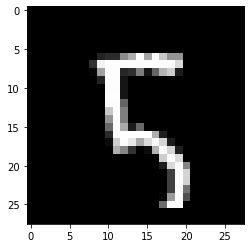

Prediction:  [7]
Label:  7


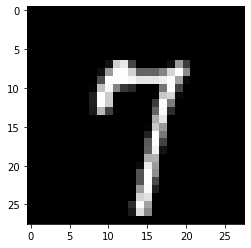

Prediction:  [0]
Label:  0


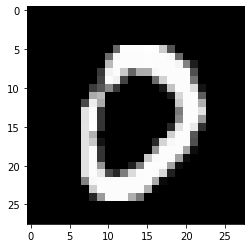

Prediction:  [5]
Label:  5


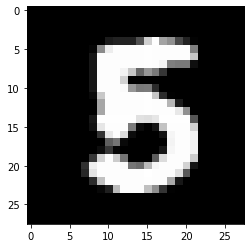

In [26]:

test_prediction(13, W1, b1, W2, b2)                                                
test_prediction(131, W1, b1, W2, b2)
test_prediction(232, W1, b1, W2, b2)
test_prediction(31, W1, b1, W2, b2)
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)